# Published Objects (Latest) (PDP Only)

This graph shows how many object records are published online. Each square represents 10,000 object records, each row counts 150,000 object records. The
top left square starts the count from object record O1.

In [1]:
import pandas as pd
import bz2
import os
import fnmatch
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load objects

objects_df = pd.read_hdf('/home/richard/Git/bbk-mqaf/data/latest/field.h5')

In [3]:
# Restrict to PDP
pdp_objects_df = objects_df.loc[objects_df[' collectionCode'] == "PDP"]


In [4]:
objects = pdp_objects_df[' systemNumber']
objects_str = objects.tolist()
# Need to remove those object records that don't even have an object id
objects_clean = [obj for obj in objects_str if type(obj) == str]
objects_num = [int(obj[1:]) for obj in objects_clean]

In [5]:
identifier_space = {}
identifer_bins = None

bins = pd.interval_range(start=1,end=2250001,freq=10000)

d = dict(zip(bins, [f"{x}" for x in range(1, 22500001, 10000)]))
identifier_bins = pd.cut(objects_num, bins=bins, right=False, include_lowest=True).map(d).value_counts()


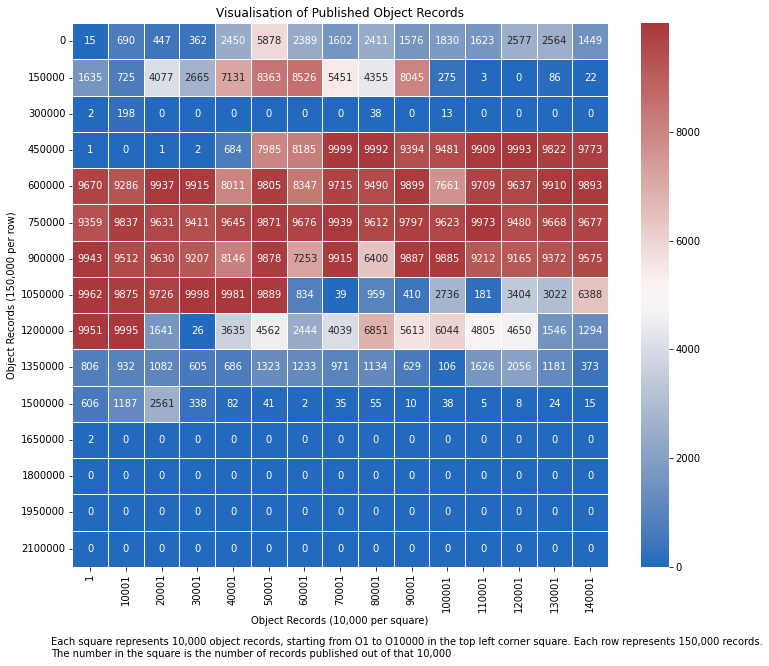

In [6]:
# Draw heatmap

df = pd.DataFrame()

x_axis = []
y_axis = []

for i in range(1, 16):
    for j in range(1, 16):
        x = (j-1)*10000 + 1
        y = (i-1)*150000 
        x_axis.append(x)
        y_axis.append(y)

# For some reason this is inverted
df = pd.DataFrame(data={'Object Records (150,000 per row)': y_axis, 'Object Records (10,000 per square)': x_axis, 'Data': identifier_bins})
objects = df.pivot("Object Records (150,000 per row)", "Object Records (10,000 per square)", "Data")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 10))

ax.set_title("Visualisation of Published Object Records (PDP only)")
f.text(.1,0, "Each square represents 10,000 object records, starting from O1 to O10000 in the top left corner square. Each row represents 150,000 records.\nThe number in the square is the number of records published out of that 10,000")

heatmap = sns.heatmap(objects, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='vlag')